Run facebox with: 
```
sudo docker run -p 8080:8080 -e "MB_KEY=$MB_KEY" machinebox/facebox_noavx
```

In [10]:
import sys
sys.path.append("../") # go to parent dir

import os.path
import requests
import shutil

from PIL import Image
import io

from machinebox.facebox import Facebox
from machinebox.core import valid_image_file
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
from pathlib import Path
root_dir = Path(os.getcwd()).parent

Test image to process

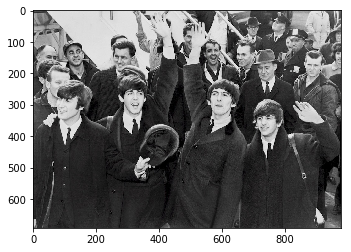

In [12]:
file_path = os.path.join(root_dir, 'resources/thebeatles.jpg')

#file_path = 'README.md' # an invalid image

if valid_image_file(file_path):
    img = plt.imread(file_path)
    plt.imshow(img);

In [13]:
root_dir

PosixPath('/Users/robincole/Documents/Github/machinebox-python-sdk')

In [14]:
facebox = Facebox() # ip_address='localhosty'

In [15]:
facebox.process_file(file_path)

Processed /Users/robincole/Documents/Github/machinebox-python-sdk/resources/thebeatles.jpg and found 12 faces


In [16]:
facebox.matched_faces

{'total_faces': 12,
 'matched_faces': {'George_Harrison': 69.83,
  'Paul_McCartney': 77.52,
  'John_Lennon': 64.59,
  'Ringo_Starr': 71.33},
 'total_matched_faces': 4}

In [17]:
facebox.faces

[{'name': None,
  'image_id': None,
  'confidence': 0.0,
  'matched': False,
  'bounding_box': {'top': 124, 'left': 636, 'width': 52, 'height': 52}},
 {'name': None,
  'image_id': None,
  'confidence': 0.0,
  'matched': False,
  'bounding_box': {'top': 129, 'left': 246, 'width': 62, 'height': 62}},
 {'name': None,
  'image_id': None,
  'confidence': 0.0,
  'matched': False,
  'bounding_box': {'top': 164, 'left': 711, 'width': 52, 'height': 52}},
 {'name': None,
  'image_id': None,
  'confidence': 0.0,
  'matched': False,
  'bounding_box': {'top': 118, 'left': 106, 'width': 52, 'height': 52}},
 {'name': None,
  'image_id': None,
  'confidence': 0.0,
  'matched': False,
  'bounding_box': {'top': 118, 'left': 549, 'width': 43, 'height': 43}},
 {'name': None,
  'image_id': None,
  'confidence': 0.0,
  'matched': False,
  'bounding_box': {'top': 166, 'left': 866, 'width': 43, 'height': 43}},
 {'name': 'George_Harrison',
  'image_id': 'george2.jpg',
  'confidence': 69.83,
  'matched': True,


## Teach
Lets teach Facebox

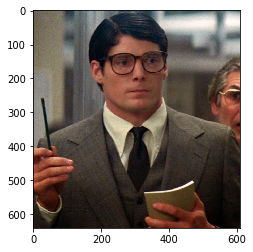

In [18]:
clark_path = os.path.join(root_dir, 'resources/clark_kent.jpg')
#file_path = 'README.md' # an invalid image

if valid_image_file(clark_path):
    img = plt.imread(clark_path)
    plt.imshow(img);

In [19]:
facebox.teach('superman', clark_path)

Taught face superman with file /Users/robincole/Documents/Github/machinebox-python-sdk/resources/clark_kent.jpg


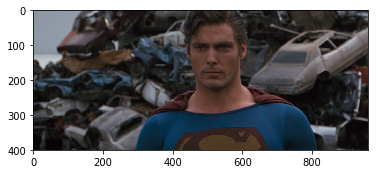

In [20]:
superman_path = os.path.join(root_dir, 'resources/superman.jpg')
#file_path = 'README.md' # an invalid image

if valid_image_file(superman_path):
    img = plt.imread(superman_path)
    plt.imshow(img);

In [21]:
facebox.process_file(superman_path)

Processed /Users/robincole/Documents/Github/machinebox-python-sdk/resources/superman.jpg and found 1 faces


In [22]:
facebox.matched_faces

{'total_faces': 1,
 'matched_faces': {'superman': 55.63},
 'total_matched_faces': 1}

## Get & Post state

In [23]:
facebox.get_state()

Downloaded state file : state.facebox


In [24]:
facebox.post_state()

Posted state file : state.facebox


In [25]:
os.remove('state.facebox')